<a href="https://colab.research.google.com/github/massimocipressi/MLPNS_MCipressi/blob/main/MPLNS_14_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
np.random.seed(135)
np.random.randn(10)

array([-1.26485598,  1.18428092,  0.35504683, -0.29794265, -0.53348411,
        0.43950814,  0.54291277,  0.0241124 , -0.92766094, -0.31561873])

In [2]:
arr=np.random.randn(10,10)
arr.mean() #media totale
arr.mean(axis=0) #media sulle colonne
arr.mean(axis=1) #media sulle righe

array([ 0.05879572,  0.27887578, -0.11589991,  0.18702002, -0.02356417,
        0.28874601,  0.01151873, -0.13187084, -0.04913222,  0.09428544])

In [3]:
np.median(arr) #mediana

0.08974345829826705

In [4]:
import scipy as sp
sp.stats.mode(arr) #moda (per colonne?)

<ipython-input-4-77b4624b020a>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  sp.stats.mode(arr) #moda (per righe?)


ModeResult(mode=array([[-1.12237343, -1.91187292, -1.02149358, -1.35884252, -1.81861597,
        -0.53052316, -1.60126095, -1.56507692, -1.46421469, -0.9124601 ]]), count=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]))

In [5]:
arr.std() #std totale
arr.std(axis=0) #std sulle colonne
arr.std(axis=1) #std sulle righe

array([0.90796487, 0.46677342, 1.11920245, 0.82476898, 0.84682159,
       0.69000903, 1.15123932, 0.90493146, 0.64811616, 0.58842802])

In [6]:
url = "https://bit.ly/videosfile"
import pandas as pd

In [7]:
videos=pd.read_csv(url)

In [8]:
videos.describe() #funziona solo sulle colonne nunmeriche

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [9]:
videos["views"].mean()

2360784.6382573447

In [12]:
#per vedere quali sono le numeriche
ncols = videos.describe().columns
#questa è la media su un data frame fa per colonne
videos[ncols].mean()

category_id      1.997243e+01
views            2.360785e+06
likes            7.426670e+04
dislikes         3.711401e+03
comment_count    8.446804e+03
dtype: float64

In [13]:
videos[ncols].std()

category_id      7.568327e+00
views            7.394114e+06
likes            2.288853e+05
dislikes         2.902971e+04
comment_count    3.743049e+04
dtype: float64

In [14]:
#possiamo trasfromare un dataframe in una matrice
videos_array = videos[ncols].values
#questa invece è la media classica quindi fa su tutto (ce l'ha sia pandas che numpy)
videos_array.mean()

489445.9035385479

In [16]:
videos_array.mean(axis=0) #ho di nuovo il precedente

array([1.99724291e+01, 2.36078464e+06, 7.42667024e+04, 3.71140089e+03,
       8.44680368e+03])

In [17]:
#possiamo vedere la correlazione (colonne numeriche)
videos.corr()

,category_id,views,likes,dislikes,comment_count
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307
views,-0.168231,1.000000,0.849177,0.472213,0.617621
likes,-0.173921,0.849177,1.000000,0.447186,0.803057
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000


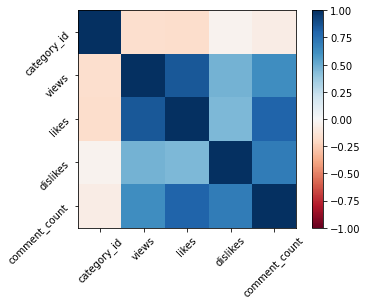

In [27]:
import pylab as pl
pl.imshow(videos[ncols].corr(),clim=(-1,1),cmap="RdBu"); #metto un limite ai colori e il nome di una colormap
pl.colorbar();
#in xticks mettiamo prima le posizioni poi i testi
pl.xticks([0,1,2,3,4],videos[ncols].columns,rotation=45);
pl.yticks([0,1,2,3,4],videos[ncols].columns,rotation=45);
#capiamo facilmente che l'id non dà info